

**Compare the sensible and latent heat generated in absorption/regeneration process**

In [1]:
import os, sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modelica interface
import buildingspy.simulate.Simulator as si
import buildingspy.io.outputfile as buipy_io

# thermal
import  CoolProp.CoolProp as CP
from CoolProp.HumidAirProp import HAPropsSI
import psychrolib as psylib
psylib.SetUnitSystem(psylib.SI)

In [2]:
sys.path.insert(0, os.path.join('..', 'calibration'))
from thermodynamics import *

import media_model_mgcl2 as model_mg
import media_model_water as model_w

In [3]:
def readResults(path, mat_name):
    res = buipy_io.Reader(path + "/{}.mat".format(mat_name), "dymola")
    return res

# test MgCl2 property

In [4]:
model_mg.rho_MgCl2(293.15, 0.2)

1177.4065969358146

In [32]:
calc_x_des_equ(318.15,0.30)

0.03197874745421767

# test moist air property and desiccant property function

## latent and sensible heat

In [16]:
T_d_in = 300.65
xi_d_in = 0.35
T_d_out = 303.45
m_d_in = 0.6
delta_Q_des = model_mg.cp_MgCl2(T_d_in, xi_d_in) * (T_d_out - T_d_in) * m_d_in
delta_Q_des

4.217489881213376

In [17]:
m_a_in = 0.3
x_a_in = 0.0155
x_a_o = 0.0096
m_a_in * (x_a_in - x_a_o) * 2501

4.42677

## humid air property

In [6]:
HAPropsSI('RH','T',273.15  + 35, 'P',101325, 'W',0.005)

0.1429074137538863

In [7]:
HAPropsSI('W','T',273 + 35,'P',101325,'RH',0.2)

0.006961363875358594

In [4]:
HAPropsSI('cp','T',299.15,'P',101325,'RH',0.05)

1008.26856184507

### calculate air sensible and latent heat difference with example of shanghai sommer

In [20]:
# temp and humidity in Shanghai in July
HAPropsSI('H','T',305.5,'P',101325,'RH',0.78)

94628.58400524332

In [22]:
HAPropsSI('H','T',299.15,'P',101325,'RH',0.78)

68463.73475542483

In [22]:
p_w = model_w.p_h2o_sat(T = 333.15)
p_w

19.945145476241585

In [21]:
p_ld = model_mg.pv_MgCl2(T=333.15, xi=0.3)
p_ld

10.486806790741099

In [24]:
calc_x_des_equ(T_des=303.15, xi_des=0.3)

0.013509939996637585

## MgCl2 property

### plot equivalent humidity ratio of desiccant

In [8]:
T_range = np.arange(278.15, 333.15, step = 1)

In [9]:
x_HA_max = [HAPropsSI('W','T',T, 'P',101325, 'RH',1) for T in T_range]

In [10]:
xi_max = [model_mg.C_max_desiccant(T) for T in T_range]
x_des_min = np.vectorize(calc_x_des_equ)(T_range, xi_max) # at each desiccant temperature, the lowest humidity ratio that air can be dried to 

In [11]:
calc_x_des_equ(T_des = 288, xi_des=0.3)

0.00520850679346458

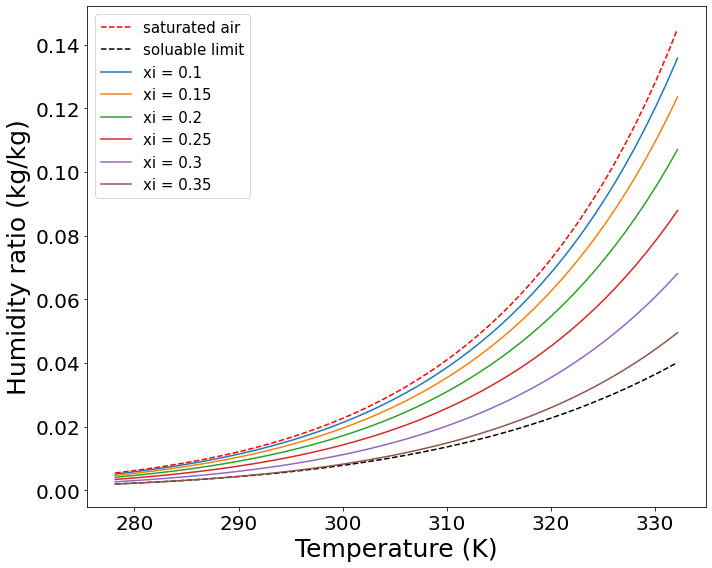

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(T_range, x_HA_max, color = 'red', linestyle = '--', label = 'saturated air') # saturated air with 100% RH

ax.plot(T_range, x_des_min, color = 'black', label = 'soluable limit', linestyle = '--')

ax.plot(T_range, [calc_x_des_equ(T_des = T, xi_des=0.1) for T in T_range], label = 'xi = 0.1')
ax.plot(T_range, [calc_x_des_equ(T_des = T, xi_des=0.15) for T in T_range], label = 'xi = 0.15')
ax.plot(T_range, [calc_x_des_equ(T_des = T, xi_des=0.2) for T in T_range], label = 'xi = 0.2')
ax.plot(T_range, [calc_x_des_equ(T_des = T, xi_des=0.25) for T in T_range], label = 'xi = 0.25')
ax.plot(T_range, [calc_x_des_equ(T_des = T, xi_des=0.3) for T in T_range], label = 'xi = 0.3')
ax.plot(T_range, [calc_x_des_equ(T_des = T, xi_des=0.35) for T in T_range], label = 'xi = 0.35')


ax.set_xlabel('Temperature (K)', fontsize = 25)
ax.set_ylabel('Humidity ratio (kg/kg)', fontsize = 25)
ax.tick_params(labelsize = 20)

plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('limit_MgCl2.png')

In [38]:
model_mg.cp_MgCl2(323.15, 0.1)

3.6048109652781593

**check temperature dependency of air heat capacity**
- results: The change of the heat capacity of humid air regarding to humidity is more signi

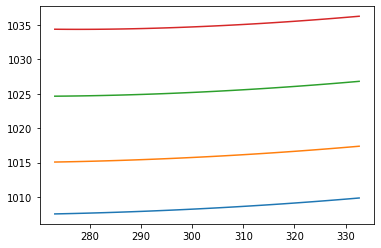

In [4]:
T_range = np.arange(273.15, 333.15, 0.5)
cp_null = [HAPropsSI('cp','T',T,'P',101325,'W',0.001) for T in T_range]
cp_low = [HAPropsSI('cp','T',T,'P',101325,'W',0.005) for T in T_range]
cp_middle = [HAPropsSI('cp','T',T,'P',101325,'W',0.01) for T in T_range]
cp_high = [HAPropsSI('cp','T',T,'P',101325,'W',0.015) for T in T_range]
plt.plot(T_range, cp_null ,T_range, cp_low, T_range, cp_middle, T_range, cp_high)

In [14]:
HAPropsSI('cp','T', 333.15,'P',101325,'W',0.0)

1008.0042666391254

In [23]:
HAPropsSI('H','T', 333.15,'P',101325,'W',0.01)

86519.06450328104

In [25]:
1.006*60 + 0.01*(1.86*60 + 2501)

86.486

In [8]:
p_h2o_sat(298.15)

0.03161189127248914

## test different vapor pressure of LiCl(aq) at dehumidification and regeneration

In [5]:
A_1 = [4.58208, -0.159174, 0.0072594]
B_1 = [-18.3816, 0.5661, -0.019314]
C_1 = [21.312, -0.666, 0.01332]

In [9]:
A_2 = [16.294, -0.8893, 0.01927]
B_2 = [74.3, -1.8035, -0.01875]
C_2 = [-226.4, 7.49, -0.039]

In [4]:
def P_v(T, X, A, B, C):
    '''
    T in K
    x in kg/kg
    
    p_v in pa ---feels like the unit should be kpa
    
    reference: Nelson Fumo 2002
    '''
    T = T-273.15
    a = A[0] + A[1]*T + A[2]*T**2
    b = (B[0] + B[1]*T + B[2]*T**2)*X
    c = (C[0] + C[1]*T + C[2]*T**2)*X**2
    P_v = a+b+c
    return P_v

In [28]:
P_v(333.15, 0.1, A_1, B_1, C_1)

16.06392

In [29]:
P_v(333.15, 0.1, A_2, B_2, C_2)

22.993000000000006

In [32]:
model_mg.pv_MgCl2(333.15, 0.1)

19.025761086619077

# Chen 2016 results

In [3]:
df_chen = pd.read_excel('../exp_data/actual_data/Chen2016.xlsx', index_col=0)

In [4]:
df_chen.head()

,T_a_in,x_a_in,m_a_in,T_d_in,xi_d_in,m_d_in,T_a_o_exp,x_a_o_exp,T_d_o_exp,xi_d_o_exp,T_d_o_sim,T_a_o_sim,x_a_o_sim
1,298.75,0.0162,1.85,288.05,0.230,2.61,292.35,0.0091,294.45,0.2288,20.19,291.89,9.29
2,301.75,0.0202,1.87,291.35,0.240,2.63,296.05,0.0116,298.35,0.2385,24.45,295.41,11.41
3,300.65,0.0181,1.92,290.85,0.255,2.65,295.05,0.0099,297.45,0.2535,23.69,294.59,10.08
4,303.15,0.0177,1.89,292.05,0.260,2.66,296.65,0.0097,298.95,0.2585,24.74,296.10,10.22
5,300.75,0.0164,1.92,290.45,0.270,2.67,294.75,0.0087,296.85,0.2685,23.10,294.19,9.03


In [5]:
df_chen = prepare_for_h_m(df_chen)

In [6]:
# dry air sensible
df_chen['delta_Q_sen'] = np.vectorize(calc_sen_heat)(df_chen.T_a_in, df_chen.T_a_o_exp, df_chen.m_da)

In [7]:
# latent 1 --> moisture sensible
df_chen['delta_Q_moisture_sensible'] = np.vectorize(calc_sen_heat)(df_chen.T_a_in, df_chen.T_a_o_exp, df_chen.m_da, df_chen.x_a_in) - df_chen['delta_Q_sen']
#1860 * (df_chen['T_a_in'] - df_chen['T_a_o_exp']) * df_chen['m_da'] * df_chen['x_a_o_exp']
#np.vectorize(calc_sen_heat)(df_chen.T_a_in, df_chen.T_a_o_exp, df_chen.m_da, df_chen.x_a_o_exp)

# latent 2 --> moisture latent

df_chen['delta_Q_moisture_latent'] = df_chen.m_a_in * (df_chen.x_a_in - df_chen.x_a_o_exp) * 2501000

In [8]:
df_chen['sen_ratio'] = df_chen['delta_Q_sen'] / df_chen['delta_Q_a']
df_chen['delta_x'] = df_chen['x_a_in'] - df_chen['x_a_o_exp']
df_chen['delta_T'] = df_chen['T_a_in'] - df_chen['T_a_o_exp']

In [9]:
df_chen[['T_a_in','delta_Q_a', 'delta_Q_sen', 'delta_Q_moisture_sensible', 'delta_Q_moisture_latent', 'sen_ratio', 'delta_x', 'delta_T']]

,T_a_in,delta_Q_a,delta_Q_sen,delta_Q_moisture_sensible,delta_Q_moisture_latent,sen_ratio,delta_x,delta_T
1,298.75,45565.126332,11913.442483,363.658988,32850.635,0.261460,0.0071,6.4
2,301.75,51998.597839,10726.330598,409.062950,40221.082,0.206281,0.0086,5.7
3,300.65,51167.111273,10819.522620,369.269935,39375.744,0.211455,0.0082,5.6
4,303.15,51216.004813,12363.045597,412.219924,37815.120,0.241390,0.0080,6.5
5,300.75,49485.489946,11592.307658,358.021017,36974.784,0.234257,0.0077,6.0
6,294.85,42187.276042,15598.018564,316.312770,26020.404,0.369733,0.0051,7.6
7,295.85,50511.886910,12288.679562,354.346188,37444.972,0.243283,0.0076,6.2
8,297.85,47422.130411,10846.705608,312.509907,35784.308,0.228727,0.0073,5.5
9,296.45,46473.374770,10411.618850,280.238126,35336.629,0.224034,0.0071,5.2
10,297.15,45716.677191,7612.838452,217.876085,37359.938,0.166522,0.0077,3.9


# MgCl2 Results

In [4]:
results_path = os.path.join(os.path.expanduser('~'), 'GIT', 'EnBA_M', 'BrineGrid_HDisNet', 'exported_results')
results_path

'C:\\Users\\guang\\GIT\\EnBA_M\\BrineGrid_HDisNet\\exported_results'

In [5]:
results1 = readResults(results_path,  'MgCl2_1')

## Todo
- [ ] T_a_in, T_d_in ......
- [ ] write function

In [44]:

T_a_out_sim = results1.values("abs.air_out.T")[1][-1]
x_a_out_sim = air_mf_to_hr(results1.values("abs.air_out.X[1]")[1][-1]) 
# in dymola, it is not humidity ratio, but mass fration, therefore need to be transfered.
x_a_out_sim = x_a_out_sim / (1-x_a_out_sim)
T_d_out_sim = results1.values("abs.abs_out.T")[1][-1]
xi_d_out_sim = results1.values("abs.abs_out.X[2]")[1][-1]

dict_1 = {'T_a_o_sim_reg':[T_a_out_sim],
         "x_a_o_sim_reg": [x_a_out_sim],
         'T_d_o_sim_reg':[T_d_out_sim],
         'xi_d_o_sim_reg':[xi_d_out_sim]}
df = pd.DataFrame(data = dict_1)

In [45]:
df

,T_a_o_sim_reg,x_a_o_sim_reg,T_d_o_sim_reg,xi_d_o_sim_reg
0,290.379517,0.005205,288.65686,0.317759
